In [3]:
import os
import pandas as pd
import numpy 
from matplotlib import pyplot as plt
from hyperopt import tpe,Trials,fmin,hp,STATUS_OK
from sklearn.metrics import recall_score,f1_score,accuracy_score,precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from collections import Counter
import warnings
from sklearn.model_selection import StratifiedKFold

dir_ = "G:\\science\\王媛老师\\实验\\数据\\分类问题"
warnings.filterwarnings("ignore")
os.chdir(dir_)
files = os.listdir(dir_)

In [51]:
data = pd.read_excel(files[6])

In [62]:
df = pd.read_excel(files[6])
data= df[df['X7']==1]
data= df[df['X7']==0]

In [64]:
Counter(df['y'])

Counter({2: 617, 1: 4372, 0: 4264, 3: 1038})

In [56]:
truecol = ['X1','X4','X5','X10','X11','X12','X14','X15','X16','X17','X18','X19']
X = data[truecol]
Y = data['y']
train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.3, random_state=1)

best={'colsample_bytree': 0.648418705639891, 'gamma': 26, 'learning_rate': 0.13480539252762264, 'max_depth': 29, 'n_estimators': 41, 'num_class': 4, 'objective': 'multi:softmax', 'subsample': 0.4503921735928323}

xgb = XGBClassifier(colsample_bytree=best['colsample_bytree'],
                   gamma = best['gamma'],learning_rate=best['learning_rate'],
                   max_depth = best['max_depth'],n_estimators=best['n_estimators'],
                   subsample = best['subsample'])

xgb.fit(train_x,train_y)
precision_recall_fscore_support(xgb.predict(test_x),test_y)

[21:23:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(array([0.79508197, 0.66666667, 0.        , 0.        ]),
 array([0.7238806 , 0.70588235, 0.        , 0.        ]),
 array([0.7578125 , 0.68571429, 0.        , 0.        ]),
 array([268, 187,   0,   0], dtype=int64))

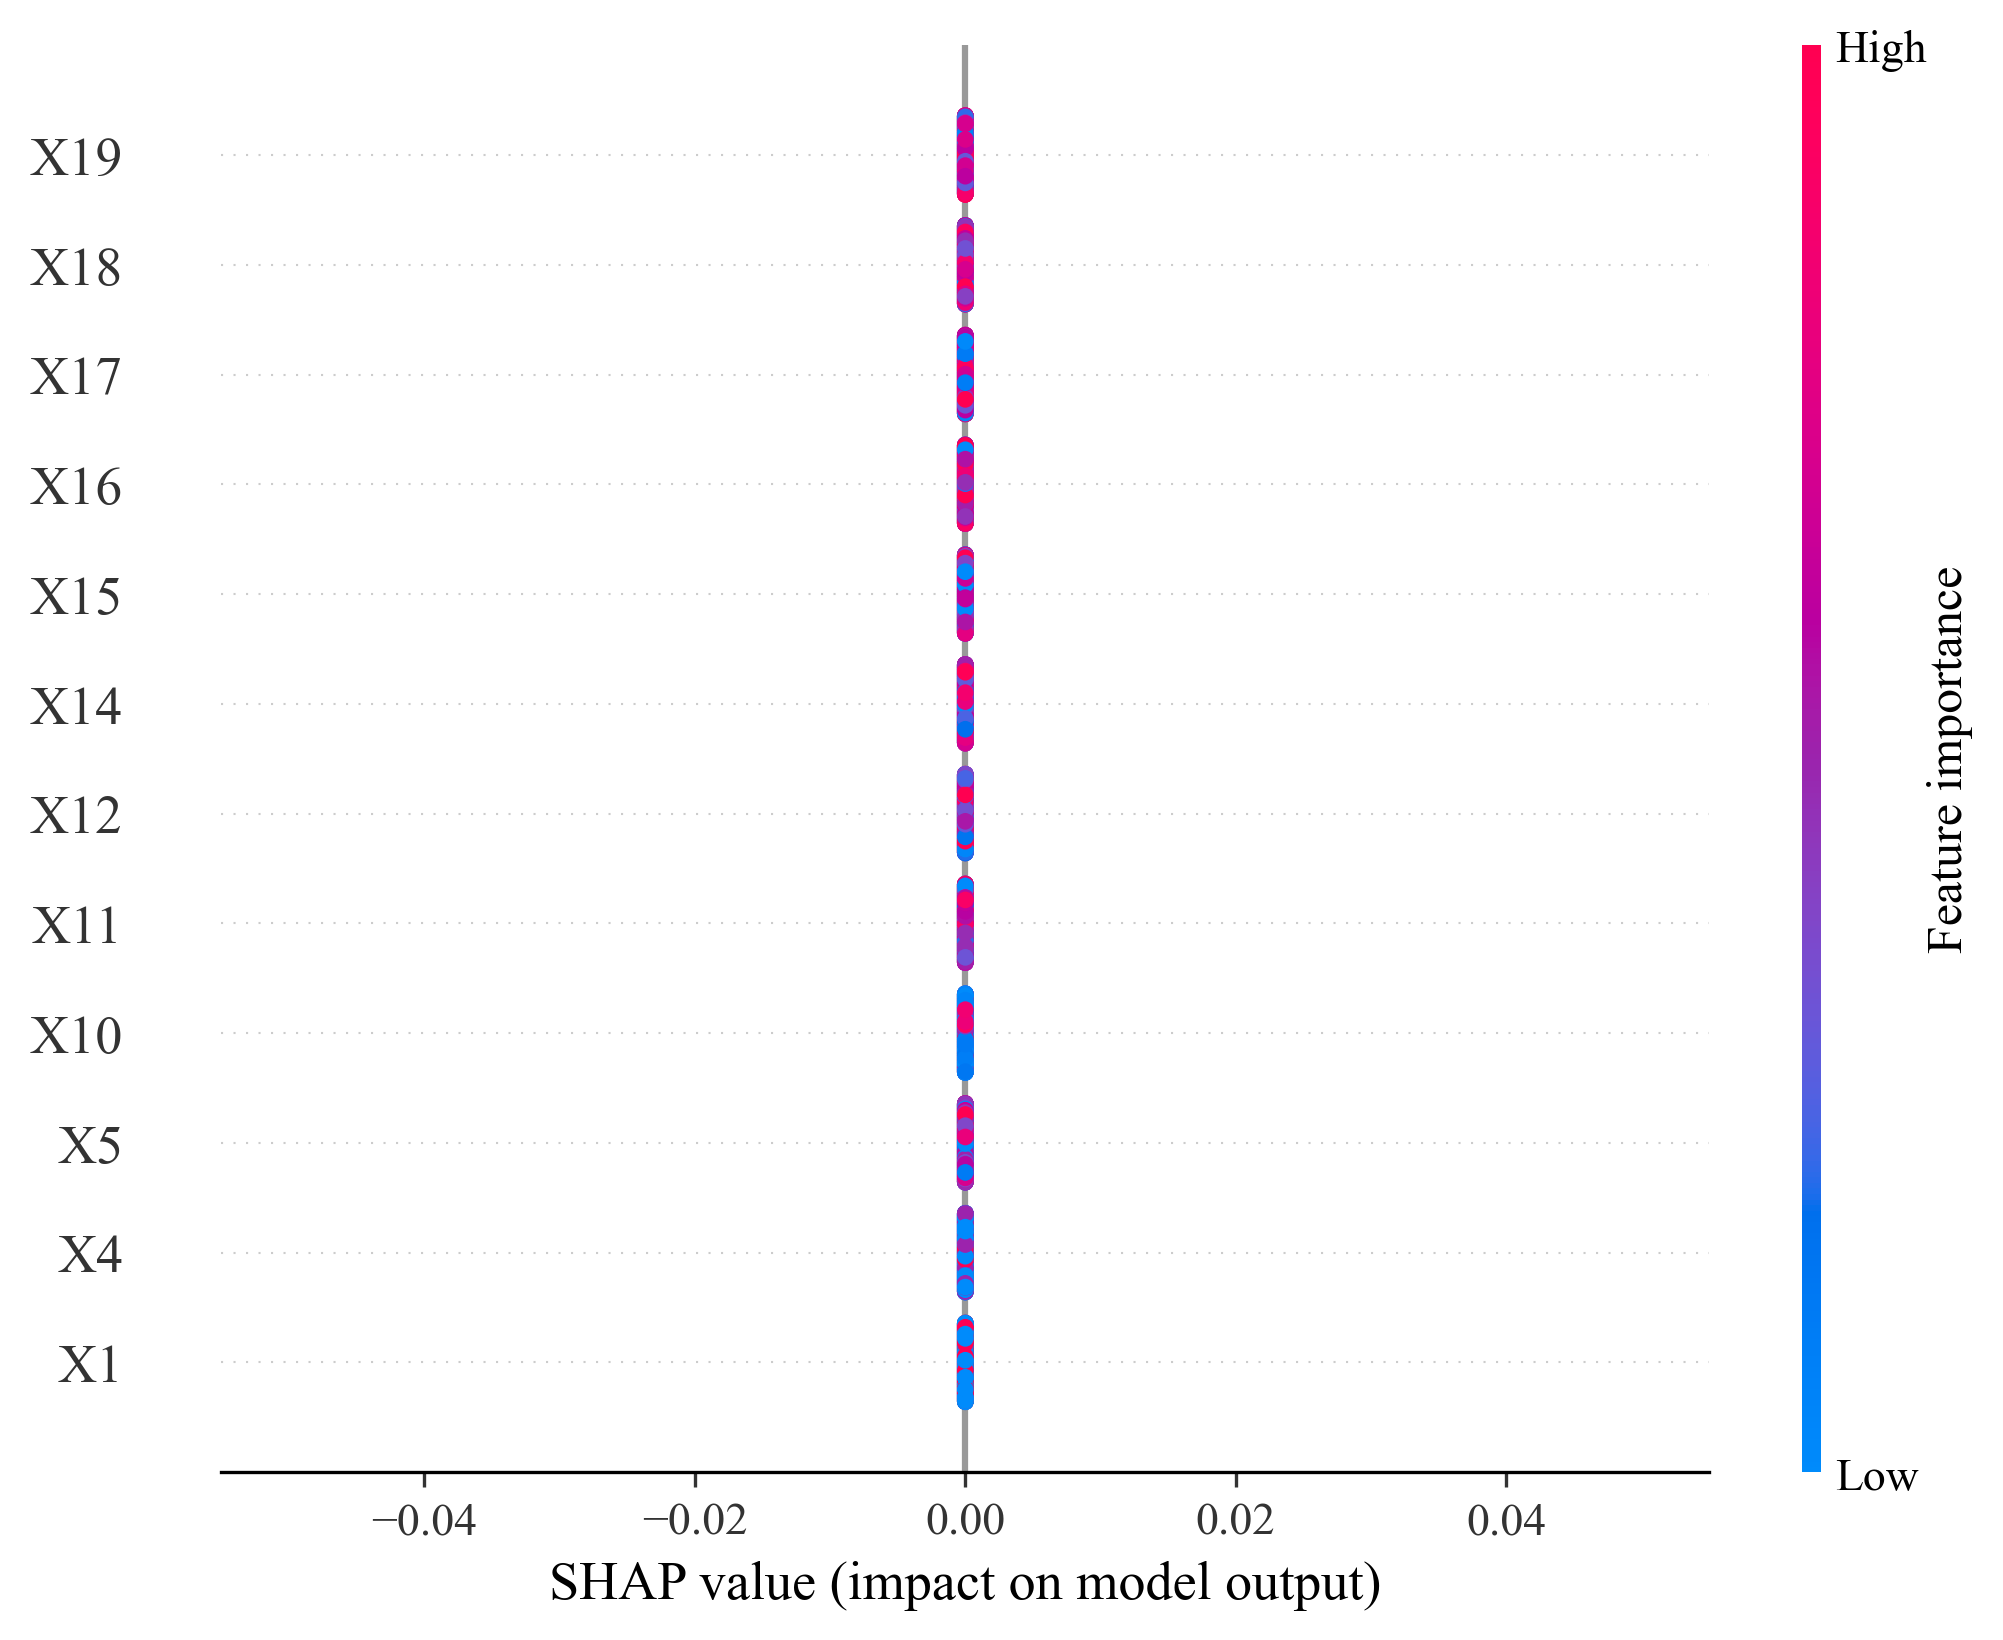

In [60]:
import shap
# model是在第1节中训练的模型
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(train_x)

import matplotlib as mpl
plt.figure()
mpl.rcParams['font.sans-serif'] = ['Times New Roman']  
mpl.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['figure.dpi'] = 300 #分辨率

shap.summary_plot(shap_values[2], train_x,show=False, color_bar_label='Feature importance')
#plt.savefig("经济困难类学生特征.jpeg",dpi=300,bbox_inches = 'tight')

In [41]:
col = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19']
Is_true = [ True, False, False,  True,  True, False,  True, False, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True]
truecol = ['X1','X4','X5','X7','X10','X11','X12','X14','X15','X16','X17','X18','X19']

In [42]:
truecol = ['X1','X4','X5','X10','X11','X12','X14','X15','X16','X17','X18','X19']
X = data[truecol]
Y = data['y']

In [43]:
train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.3, random_state=1)

In [135]:
def hyperopt_train_test_xgb(params):
    xgb = XGBClassifier(**params)
    xgb.fit(train_x,train_y)
    return accuracy_score(xgb.predict(train_x),train_y)

xgb_trials = Trials()

best = 0
def f(params):
    global best
    f1 = hyperopt_train_test_xgb(params)
    if f1 > best:
        best = f1
    print('new best:', best, params)
    return {'loss': -f1, 'status': STATUS_OK}

space_xgb = {
    'objective':'multi:softmax',
    'num_class':4,
    'n_estimators': hp.choice('n_estimators', range(0,500)),
    'subsample':hp.uniform('subsample',0,1),
    'learning_rate':hp.uniform('learning_rate',0.01,0.3),
    'max_depth':hp.choice('max_depth', range(5,30)),
    'colsample_bytree':hp.uniform('colsample_bytree',0,1),
    'gamma':hp.choice('gamma',range(0,30)),
}
best = fmin(f, space_xgb, algo=tpe.suggest, max_evals=30, trials=xgb_trials)

[11:04:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
new best:                                                                                                              
0.616965153408302                                                                                                      
{'colsample_bytree': 0.23204490400204292, 'gamma': 19, 'learning_rate': 0.19151069105028498, 'max_depth': 26, 'n_estimators': 490, 'num_class': 4, 'objective': 'multi:softmax', 'subsample': 0.5520050967558495}
[11:06:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'

new best:                                                                                                              
0.8606136332083854                                                                                                     
{'colsample_bytree': 0.8891180970443794, 'gamma': 16, 'learning_rate': 0.2511186951841673, 'max_depth': 16, 'n_estimators': 331, 'num_class': 4, 'objective': 'multi:softmax', 'subsample': 0.5193880348862467}
[11:14:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
new best:                                                                                                              
0.8606136332083854                                                                                                     
{

In [149]:
xs = np.array([t['misc']['vals']['learning_rate'] for t in xgb_trials.trials]).ravel()

In [151]:
ys = [-t['result']['loss'] for t in xgb_trials.trials]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

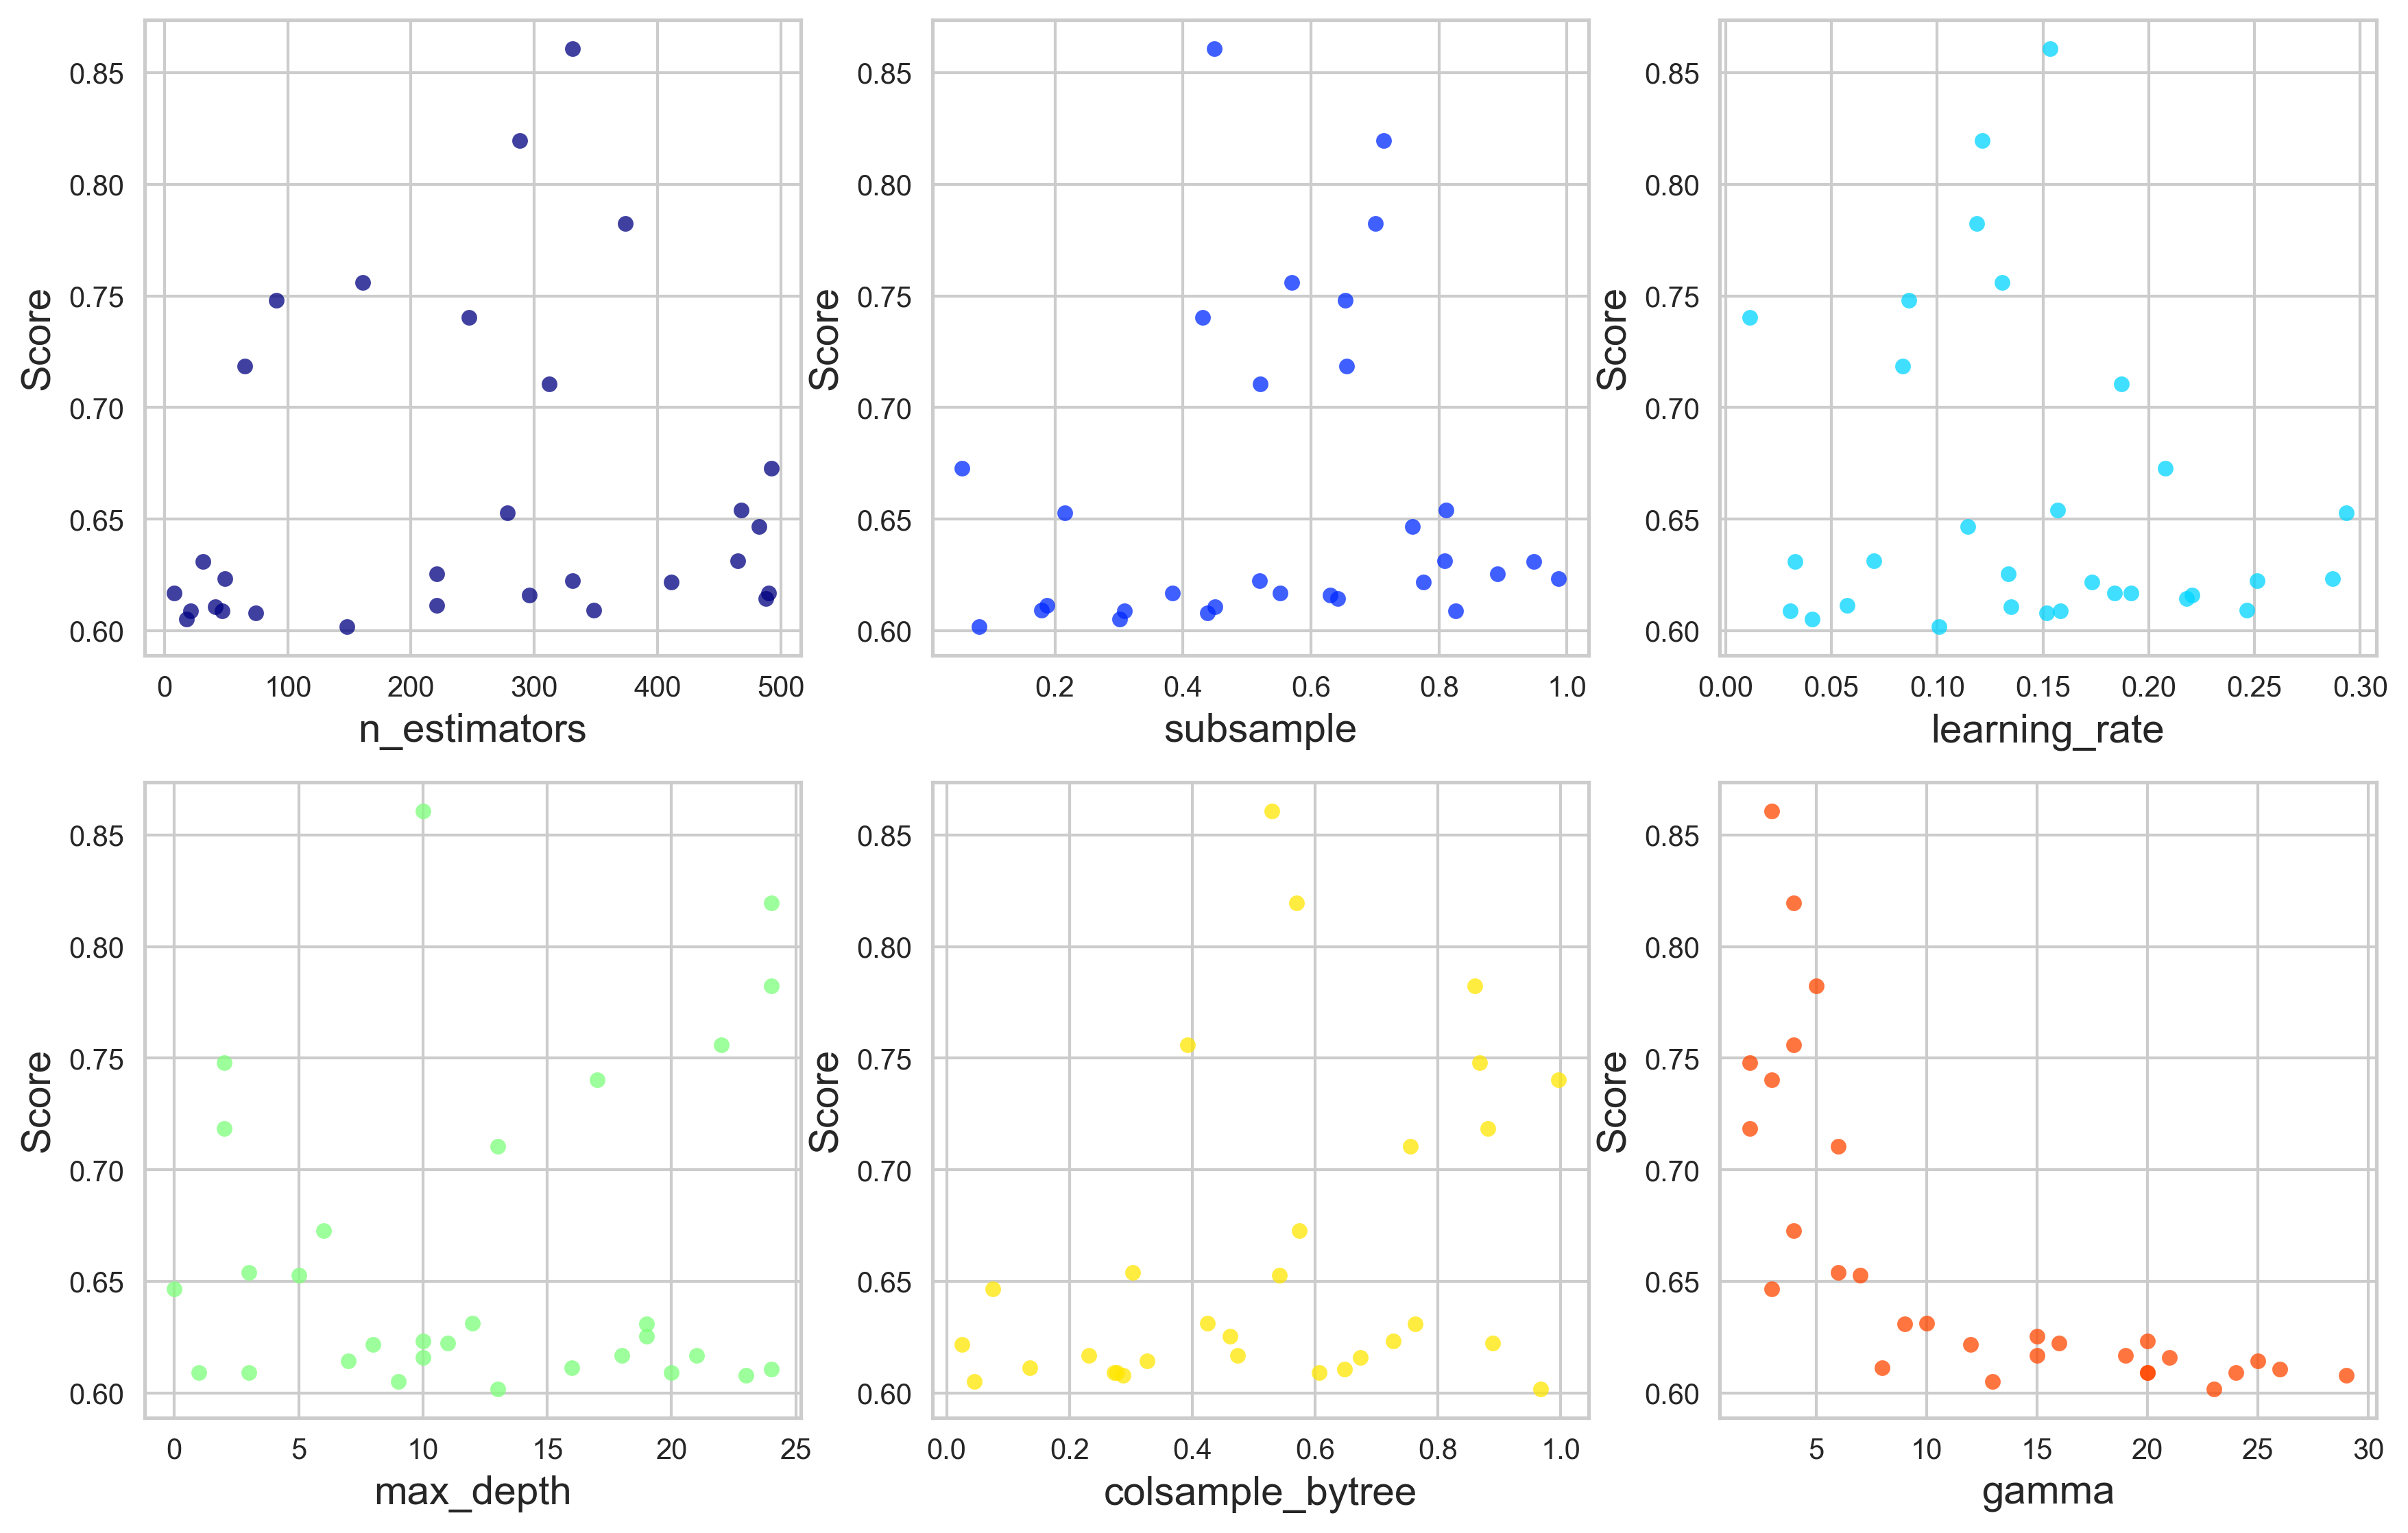

In [166]:
parameters = ['n_estimators', 'subsample', 'learning_rate','max_depth','colsample_bytree','gamma']
cols = len(parameters)
f, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,9),dpi=300)
cmap = plt.cm.jet
for i, val in enumerate(parameters):
    xs = np.array([t['misc']['vals'][val] for t in xgb_trials.trials]).ravel()
    ys = [-t['result']['loss'] for t in xgb_trials.trials]
    ys = np.array(ys)
    if i<=2:
        axes[0,i].scatter(xs, ys, s=30, linewidth=0.01, alpha=0.75, c=cmap(float(i)/len(parameters)))
        axes[0,i].set_xlabel(val,fontsize=14)
        axes[0,i].set_ylabel('Score',fontsize=14)
    else:
        axes[1,i-3].scatter(xs, ys, s=30, linewidth=0.01, alpha=0.75, c=cmap(float(i)/len(parameters)))
        axes[1,i-3].set_xlabel(val,fontsize=14)
        axes[1,i-3].set_ylabel('Score',fontsize=14)
plt.savefig("Tpe.jpeg",bbox_inches='tight')
plt.savefig("Tpe.pdf",bbox_inches='tight')

In [44]:
best={'colsample_bytree': 0.648418705639891, 'gamma': 26, 'learning_rate': 0.13480539252762264, 'max_depth': 29, 'n_estimators': 41, 'num_class': 4, 'objective': 'multi:softmax', 'subsample': 0.4503921735928323}

xgb = XGBClassifier(colsample_bytree=best['colsample_bytree'],
                   gamma = best['gamma'],learning_rate=best['learning_rate'],
                   max_depth = best['max_depth'],n_estimators=best['n_estimators'],
                   subsample = best['subsample'])

In [45]:
xgb.fit(train_x,train_y)
precision_recall_fscore_support(xgb.predict(test_x),test_y)

[21:13:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(array([1., 0.]),
 array([0.8473789, 0.       ]),
 array([0.91738506, 0.        ]),
 array([3014,    0], dtype=int64))

In [46]:
import shap
# model是在第1节中训练的模型
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(train_x)

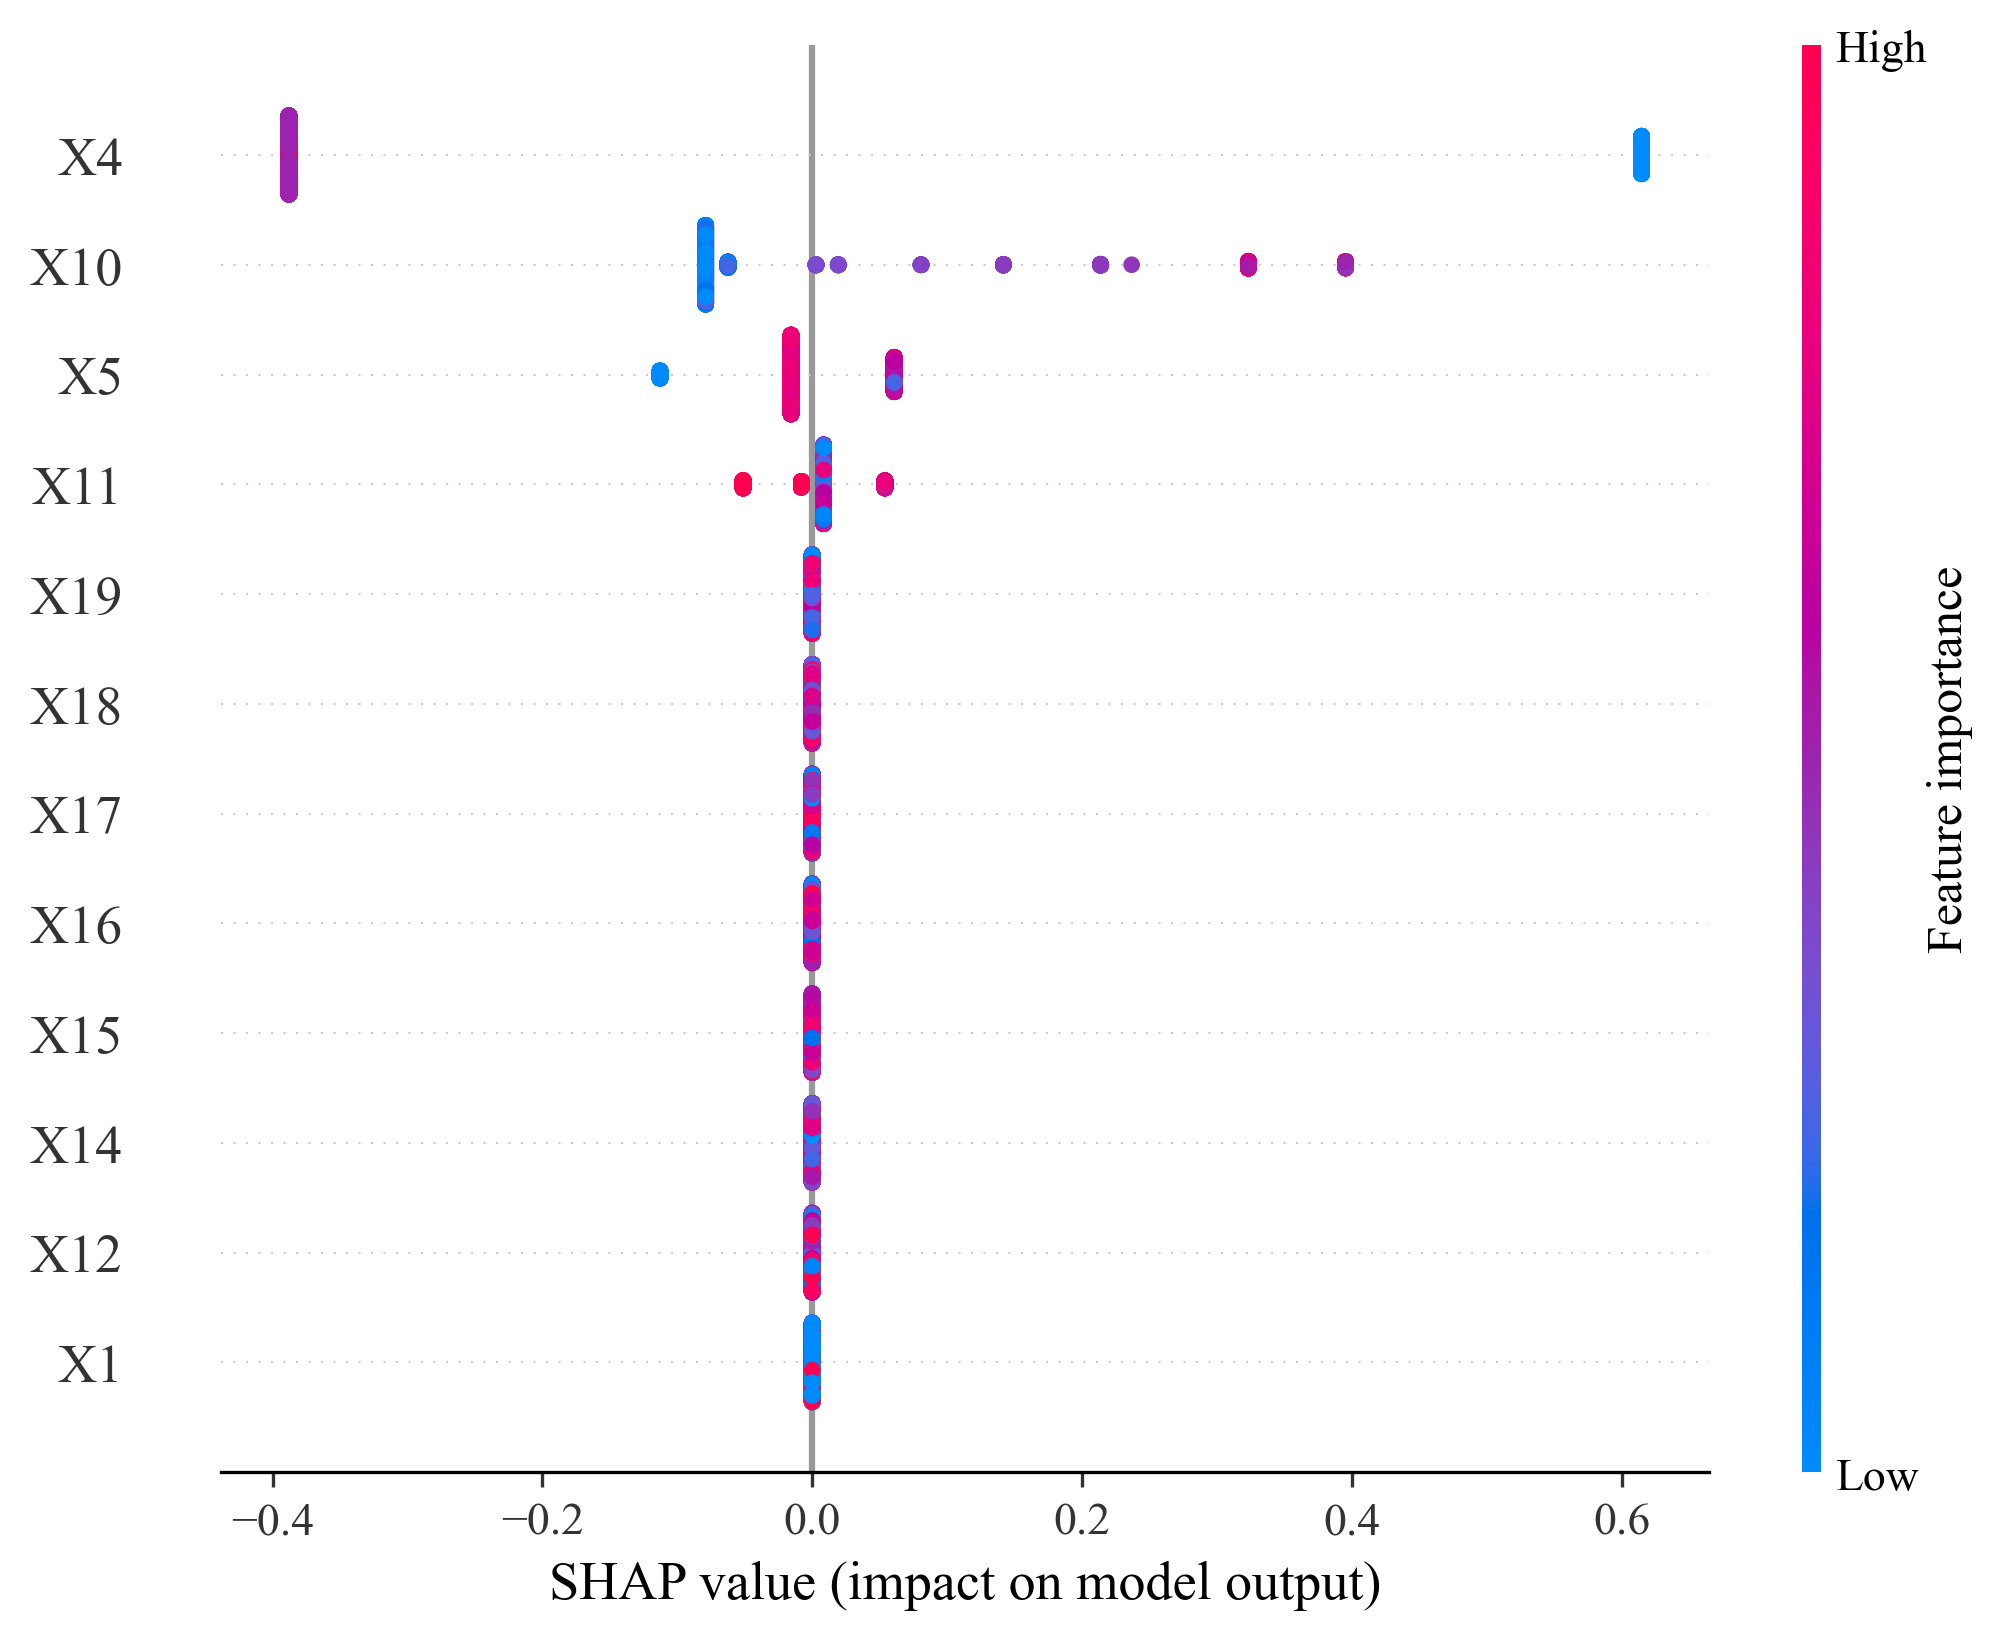

In [48]:
import matplotlib as mpl
plt.figure()
mpl.rcParams['font.sans-serif'] = ['Times New Roman']  
mpl.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['figure.dpi'] = 300 #分辨率

shap.summary_plot(shap_values, train_x,show=False, color_bar_label='Feature importance')
plt.savefig("经济困难类学生特征.jpeg",dpi=300,bbox_inches = 'tight')
#plt.savefig("国内深造.pdf",dpi=300,bbox_inches = 'tight')